## Import libraries which is needed

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

## Preparing the house data

Load california house price and show it

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'MedHouseVal'}>]], dtype=object)

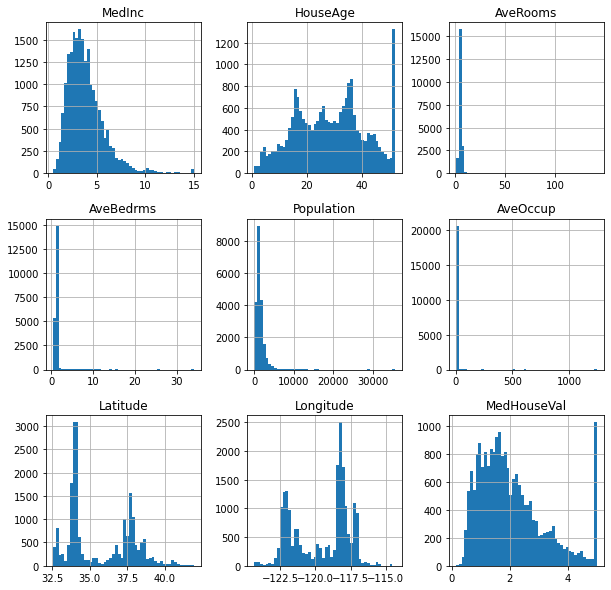

In [60]:
california = datasets.fetch_california_housing(as_frame=True)
print(california.DESCR)
california.frame.hist(figsize=(10, 10), bins=50)

we could find in MedHouseVal graph,when x = 5 it has some exceptional distributions.Those data are harmful to model training, we should delete they.


In [61]:
x = california.data
# print(type(x))
# print(x)
y = california.target
# print(type(y))
# print(y)

# plt.scatter(x,y)
# plt.show()
x = x[y < 5]
y = y[y < 5]
# plt.scatter(x,y)
# plt.show()
print(x.shape)
print(y.shape)

(19648, 8)
(19648,)


60% training, 20% validation, 20% test


In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25)

print('x_train shape is ' + str(x_train.shape))
print('y_train shape is ' + str(y_train.shape))
print('x_val shape is ' + str(x_val.shape))
print('y_val shape is ' + str(y_val.shape))
print('x_test shape is ' + str(x_test.shape))
print('y_test shape is ' + str(y_test.shape))

x_train shape is (11788, 8)
y_train shape is (11788,)
x_val shape is (3930, 8)
y_val shape is (3930,)
x_test shape is (3930, 8)
y_test shape is (3930,)


Standardize the data to makes sure the value of each attribute provided by all samples
have a mean of 0, and a standard deviation (s) of 1.

In [63]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

## Train and predict the model

**Linear regression model** and calculate the *score*.

In [64]:
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)
y_pred_val = linear_regression.predict(x_val)
linear_score=linear_regression.score(x_val, y_val)
lin_mse = metrics.mean_squared_error(y_test,y_pred_val)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression score is: ',end='')
print(linear_score)

Linear Regression score is: 0.5852500512809189


when we get linear regression,it easy to implement polynomial regression
**polynomial regression** and calculate the score.
we using degree from 2 to 4
Since polynomial regression need hyperparameters, we calculate the score on the validation set to find the best degree for the data.

In [65]:
scores = []
#degree = 2
polynomial_regression = Pipeline([('poly', PolynomialFeatures(degree=2)),
                                  ('sceler', StandardScaler()),
                                  ('linear_regression', LinearRegression())])
polynomial_regression.fit(x_train, y_train)
scores.append(polynomial_regression.score(x_val, y_val))
#degree = 3
polynomial_regression = Pipeline([('poly', PolynomialFeatures(degree=3)),
                                  ('scaler', StandardScaler()),
                                  ('linear_regression', LinearRegression())])
polynomial_regression.fit(x_train, y_train)
scores.append(polynomial_regression.score(x_val, y_val))
#degree = 4
polynomial_regression = Pipeline([('poly', PolynomialFeatures(degree=4)),
                                  ('scalar', StandardScaler()),
                                  ('linear_regression', LinearRegression())])
polynomial_regression.fit(x_train, y_train)
scores.append(polynomial_regression.score(x_val, y_val))

print("degree = 2 polynomial_regression score :"+ str(scores[0]))
print("degree = 3 polynomial_regression score :"+ str(scores[1]))
print("degree = 4 polynomial_regression score :"+ str(scores[2]))


degree = 2 polynomial_regression score :0.5628172364162672
degree = 3 polynomial_regression score :-5.517946792026234
degree = 4 polynomial_regression score :-1267774.7940212395


**decision tree regression** and calculate the *score*.

In [66]:
tree_regression = DecisionTreeRegressor(random_state=11)
tree_regression.fit(x_train, y_train)
y_pred_val = tree_regression.predict(x_val)
print("tree regression score: ",end= ' ')
print(tree_regression.score(x_val, y_val))

tree regression score:  0.5139385793412374


We can see that the linear regression has the best score. So we make predictions on the test set with such model.

In [67]:
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)
y_pred_test = linear_regression.predict(x_test)
linear_score=linear_regression.score(x_test, y_test)
print('linear_regression '+str(linear_regression))
print('y_train.mean() '+str(y_train.mean()))
print('y_pred_test.mean() '+str(y_pred_test.mean()))
print('y_train.var() '+str(y_train.var()))
print('y_pred_val.var() '+ str(y_pred_val.var()))


linear_regression LinearRegression()
y_train.mean() 1.9211033237190365
y_pred_test.mean() 1.927213978414835
y_train.var() 0.9492883866118585
y_pred_val.var() 0.962607563471761


Conclude that the linear regression perform well and have a small bias and variance close to the original data.

## Questions

1. Linear regressions can be used in business to evaluate trends and make estimates or forecasts.
> For example, if a company’s sales have increased steadily every month for the past few years, by conducting a linear analysis on the sales data with monthly sales, the company could forecast sales in future months.
2. Advantage:
>Easy to implement and efficient for huge data.
>When the data is similar to linear or polynomial distribution, the model perform well.
3. DISADVANTAGE:
>When the data are non-linear, for those two models would preform poor.
4. If we know the distribution of the data tend to be linear or polynomial, we can choose these two models.